# JSON API

You need to run '_start_server.py' before running the notebook.

In [1]:
imgfile = "cat-2942887__480.jpg"

In [3]:
%matplotlib inline

In [4]:
from PIL import Image
img = Image.open(imgfile)

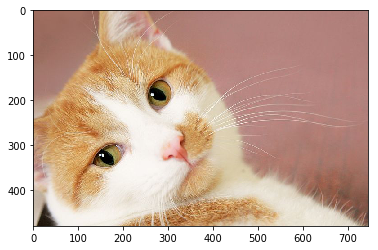

In [5]:
import numpy
from matplotlib.pyplot import imshow
imshow(numpy.asarray(img))

In [9]:
from lightmlrestapi.args import image2base64
import ujson
import requests
b64 = image2base64(imgfile)[1]
features = ujson.dumps({'X': b64})
r = requests.post('http://127.0.0.1:8081', data=features)
js = r.json()

In [10]:
js

{'Y': [[[0.0, 10, {'name': 'oneclass\\cat-2942887__480.jpg'}],
   [0.3883158691, 5, {'name': 'oneclass\\cat-2603300__480.jpg'}],
   [0.4457001921, 12, {'name': 'oneclass\\cat-2947188__480.jpg'}],
   [0.4618436036, 28, {'name': 'oneclass\\shotlanskogo-2934720__480.jpg'}],
   [0.4810128851, 2, {'name': 'oneclass\\cat-1508613__480.jpg'}]]]}

In [12]:
res = []
for ans in js['Y']:
    for n in ans:
        res.append((n[0], n[2]['name']))

In [14]:
import os
txts = list(map(lambda x: str(x[0]), res))
imgs = list(map(lambda x: os.path.join('images', x[1]), res))

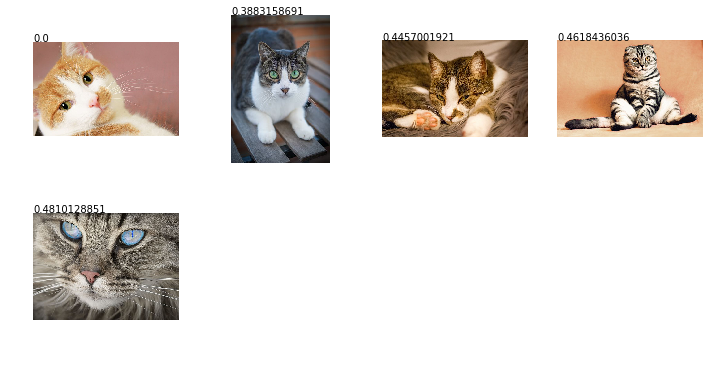

In [16]:
from mlinsights.plotting import plot_gallery_images
plot_gallery_images(imgs, txts);